# EDA - Assignment-6

**Name: Jash Shah**

**S.ID: 202201016**

# Question

Predict the loan_status using any classifier.
Follow this general Pipeline :

1) Data Preprocessing

2) EDA

3) Prediction using any Model

4) Accuracy calculations

Submissions:

Upload the colab file(share link fo colab) [Give Permission to read file]
Create Submission File:
Submission File should Contains

For each id row in the test set, you must predict target loan_status. The file should contain a header and have the following format:

id,loan_status

58645, 0.5

58646, 0.5

58647, 0.5

etc.

**Import all the necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Data Pre-processing and EDA

In [ ]:
data = pd.read_csv('Loan_train.csv')

In [ ]:
data.shape

(58645, 13)

id:

A unique identifier for each loan application. This feature is primarily used for tracking and referencing individual records in the dataset.

person_age:

The age of the individual applying for the loan. Age can influence financial behavior and risk assessment, as younger applicants may have less credit history, while older applicants may have more stable incomes.

person_income:

The annual income of the individual. Higher income levels generally indicate a greater capacity to repay loans, influencing creditworthiness and loan approval decisions.

person_home_ownership:

A categorical variable indicating the individual's home ownership status (e.g., own, rent, mortgage). Home ownership can affect financial stability and risk assessment; homeowners may be perceived as lower risk compared to renters.

person_emp_length:

The length of employment in years. Longer employment duration suggests job stability, which is a positive indicator for lenders regarding an applicant's ability to repay the loan.

loan_intent:

A categorical variable describing the purpose of the loan (e.g., debt consolidation, home improvement, education). Understanding the intent helps lenders assess risk and determine appropriate loan terms.

loan_grade:

A categorical variable representing the grade or quality of the loan based on the lender's risk assessment criteria. This grading system helps categorize loans into different risk levels and informs interest rates.

loan_amnt:

The total amount of money requested by the borrower. Larger loan amounts can indicate higher risk, as they represent a greater financial obligation for the borrower.

loan_int_rate:

The interest rate applied to the loan. This rate is crucial for determining the cost of borrowing; higher interest rates typically indicate higher perceived risk by lenders.

loan_percent_income:

The percentage of the borrower's income that will go toward repaying the loan. A higher percentage suggests a heavier financial burden on the borrower, which could impact their ability to repay.

cb_person_default_on_file:

A binary feature indicating whether there is a record of default in the individual's credit history (1 = default on file, 0 = no default). This is a critical factor in assessing credit risk.

cb_person_cred_hist_length:

The length of the individual's credit history in years. A longer credit history provides more data for assessing creditworthiness and can positively influence loan approval chances.

loan_status:

The target variable indicating whether the loan was approved or not (e.g., approved, denied). This feature is crucial for training machine learning models to predict future loan outcomes based on other features.

In [ ]:
data.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [ ]:
data.head(10)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0
5,5,27,45000,RENT,2.0,VENTURE,A,9000,8.94,0.20,N,5,0
6,6,25,45000,MORTGAGE,9.0,EDUCATION,A,12000,6.54,0.27,N,3,0
7,7,21,20000,RENT,0.0,PERSONAL,C,2500,13.49,0.13,Y,3,0
8,8,37,69600,RENT,11.0,EDUCATION,D,5000,14.84,0.07,Y,11,0
9,9,35,110000,MORTGAGE,0.0,DEBTCONSOLIDATION,C,15000,12.98,0.14,Y,6,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [ ]:
data.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [ ]:
data.isnull().sum() #Check for missing values

,0
id,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_percent_income,0


Now we plot various plots:

1. Histograms for Numerical Features
2. Box Plots for Numerical Features by Loan Status
3. Count Plots for Categorical Features:
4. Correlation Heatmap


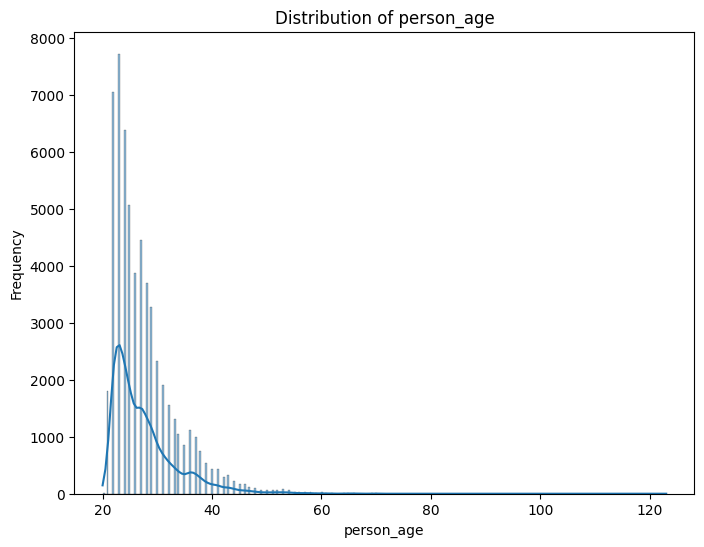

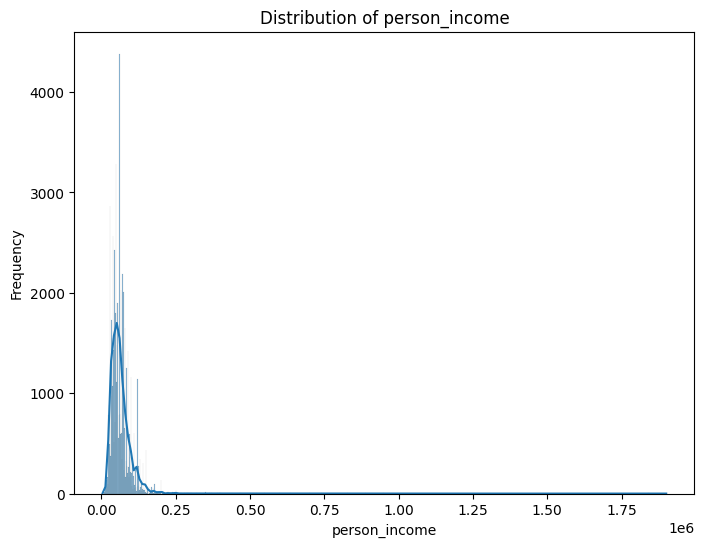

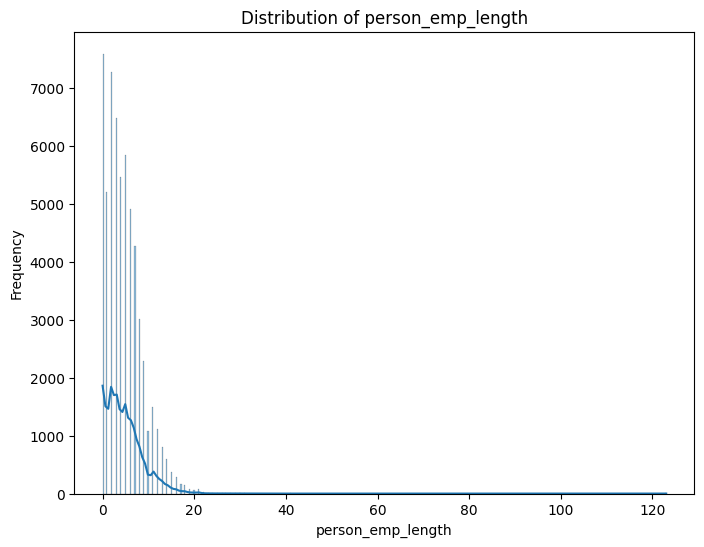

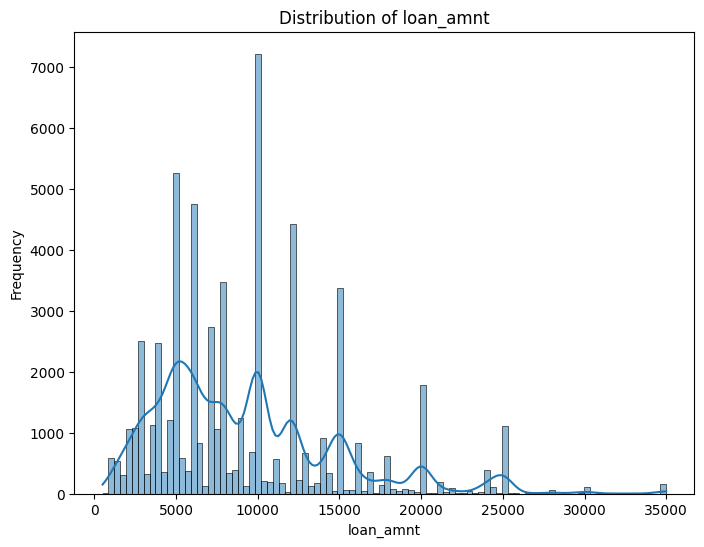

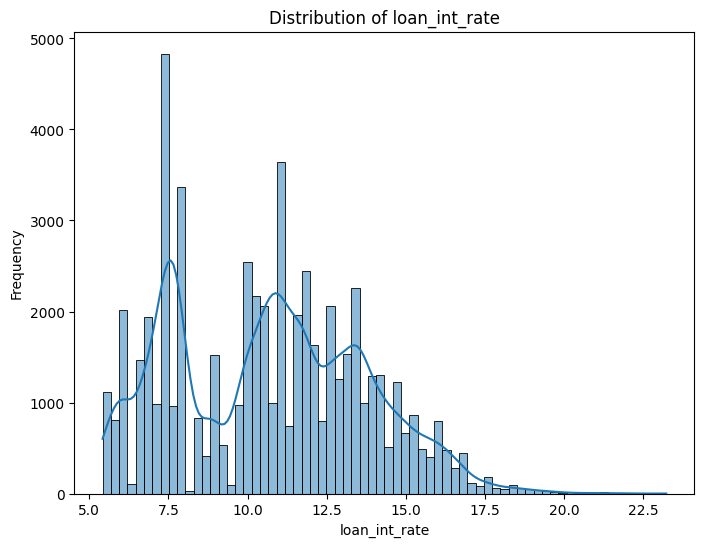

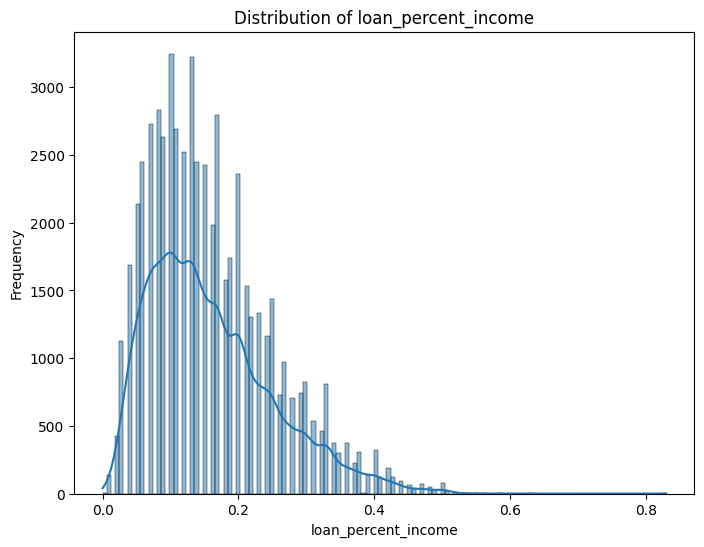

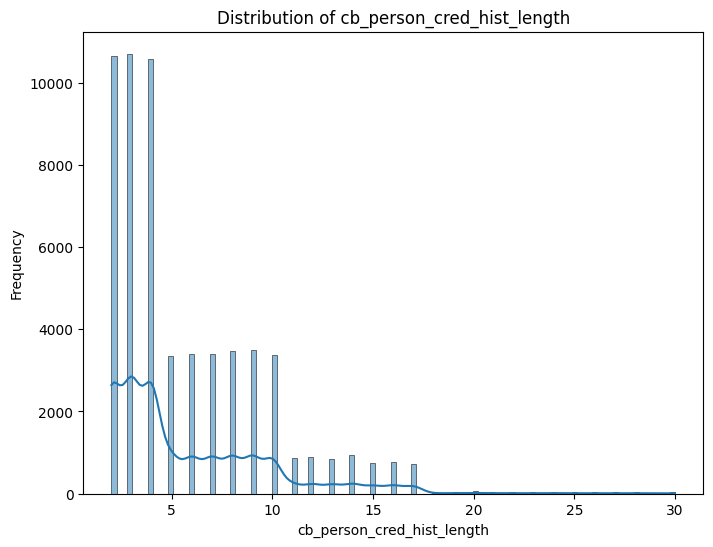

In [ ]:
numerical_features = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

for feature in numerical_features:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    sns.histplot(data[feature], kde=True)  # kde adds a density curve
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

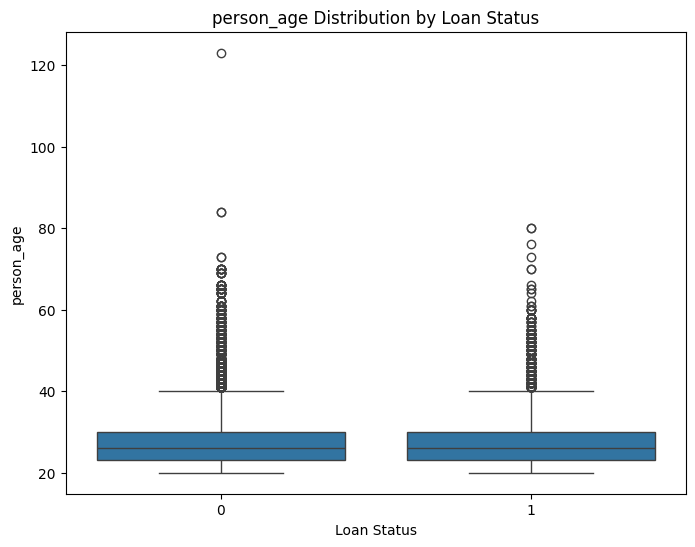

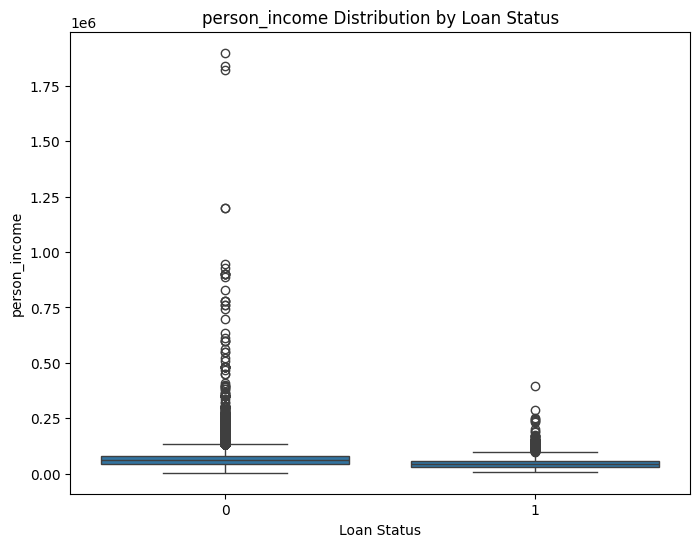

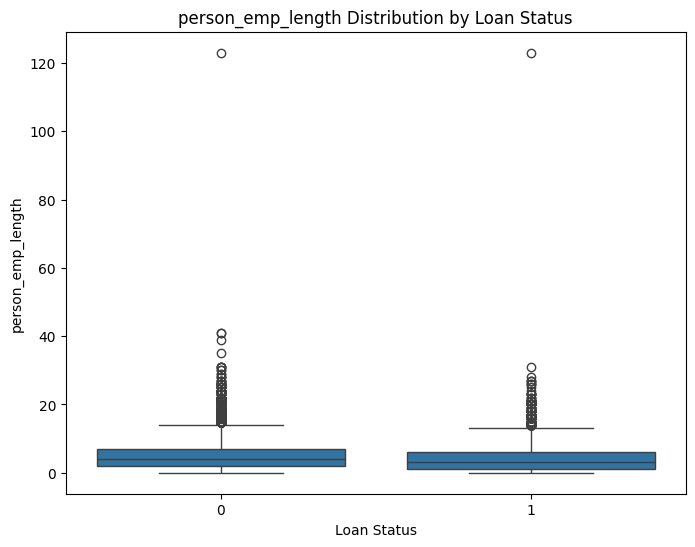

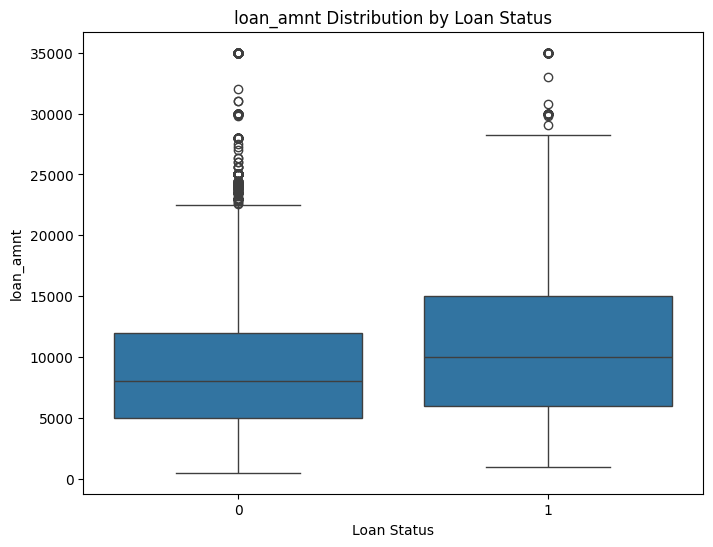

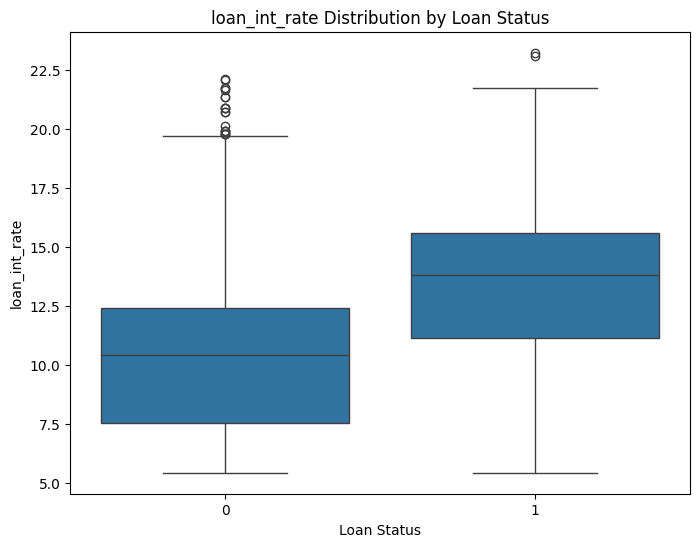

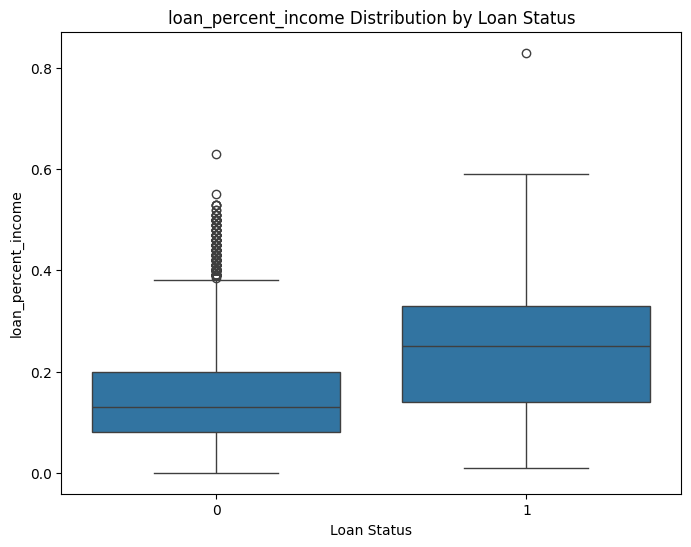

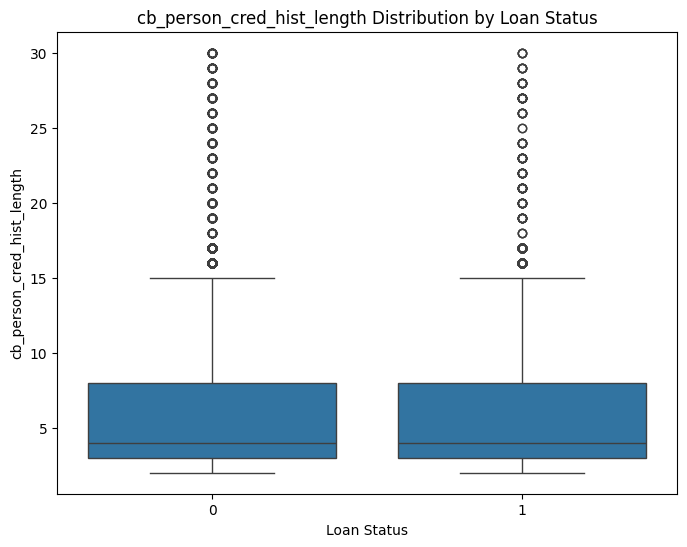

In [ ]:
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='loan_status', y=feature, data=data)
    plt.title(f'{feature} Distribution by Loan Status')
    plt.xlabel('Loan Status')
    plt.ylabel(feature)
    plt.show()

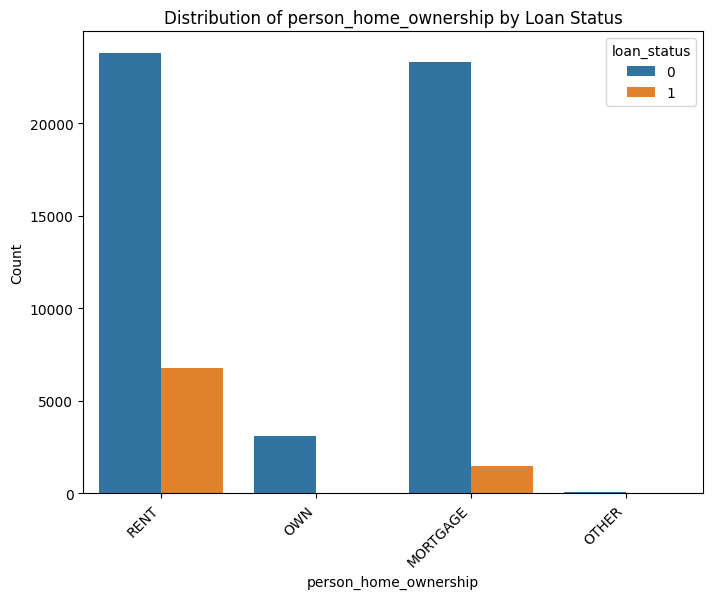

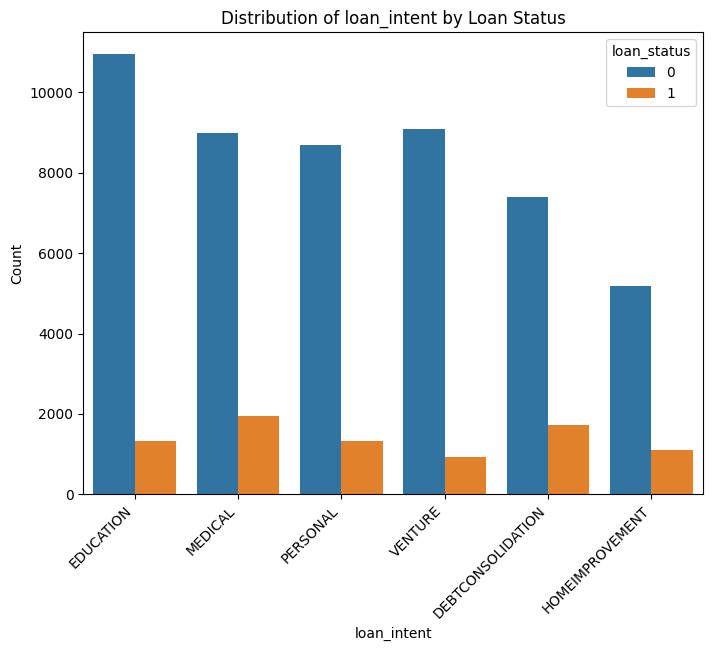

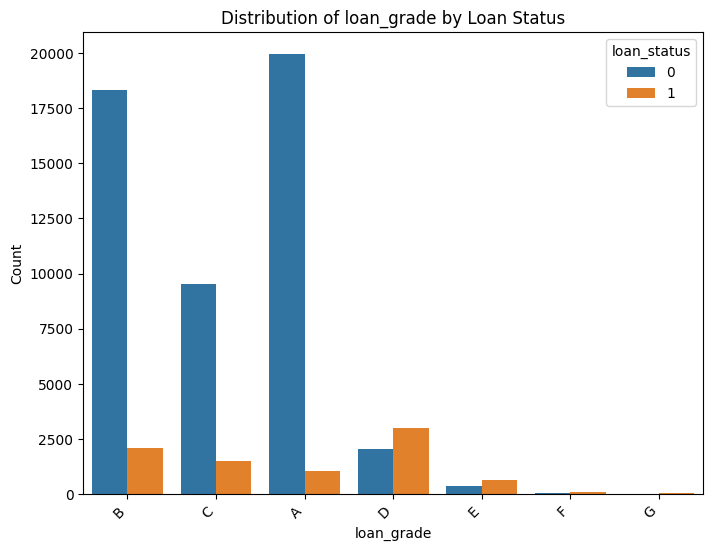

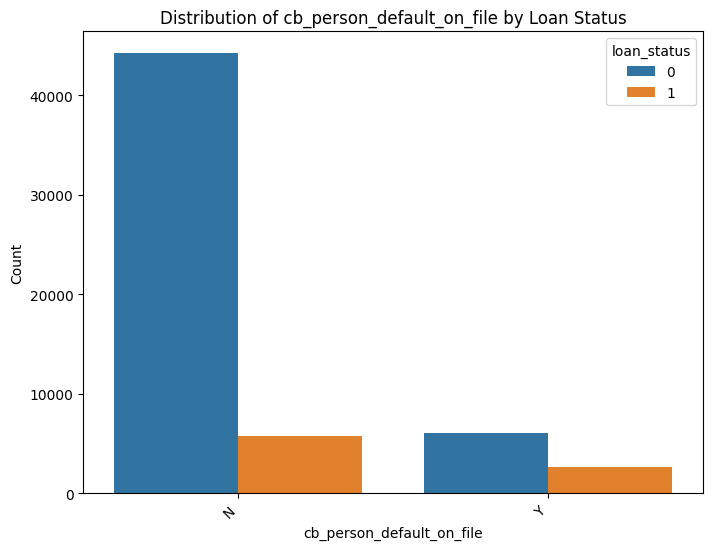

In [ ]:
categorical_features = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, data=data, hue='loan_status')  # hue adds loan status comparison
    plt.title(f'Distribution of {feature} by Loan Status')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
    plt.show()

**We will perform OneHotEncoding to all the categorical columns**

**Why not Label Encoding, because Label Encoding will infuse an order among the categorical features which is not what we want. So we will go with Onehot encoding**

In [ ]:
def one_hot_encode_categorical_features(data, categorical_features):

    onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    encoded_features = onehot_encoder.fit_transform(data[categorical_features])
    encoded_df = pd.DataFrame(
        encoded_features, columns=onehot_encoder.get_feature_names_out(categorical_features)
    )

    data = pd.concat([data, encoded_df], axis=1)

    data = data.drop(categorical_features, axis=1)

    categorical_features = onehot_encoder.get_feature_names_out(categorical_features).tolist()

    return data, categorical_features

In [ ]:
data, categorical_features = one_hot_encode_categorical_features(data, categorical_features)
data.head()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status,person_home_ownership_MORTGAGE,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,0,37,35000,0.0,6000,11.49,0.17,14,0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,22,56000,6.0,4000,13.35,0.07,2,0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,29,28800,8.0,6000,8.90,0.21,10,0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,30,70000,14.0,12000,11.11,0.17,5,0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,22,60000,2.0,6000,6.92,0.10,3,0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
data.columns

Index(['id', 'person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'loan_status', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y'],
      dtype='object')

Number of columns is increased due to the use of OneHotEncoding

In [ ]:
categorical_features

['person_home_ownership_MORTGAGE',
 'person_home_ownership_OTHER',
 'person_home_ownership_OWN',
 'person_home_ownership_RENT',
 'loan_intent_DEBTCONSOLIDATION',
 'loan_intent_EDUCATION',
 'loan_intent_HOMEIMPROVEMENT',
 'loan_intent_MEDICAL',
 'loan_intent_PERSONAL',
 'loan_intent_VENTURE',
 'loan_grade_A',
 'loan_grade_B',
 'loan_grade_C',
 'loan_grade_D',
 'loan_grade_E',
 'loan_grade_F',
 'loan_grade_G',
 'cb_person_default_on_file_N',
 'cb_person_default_on_file_Y']

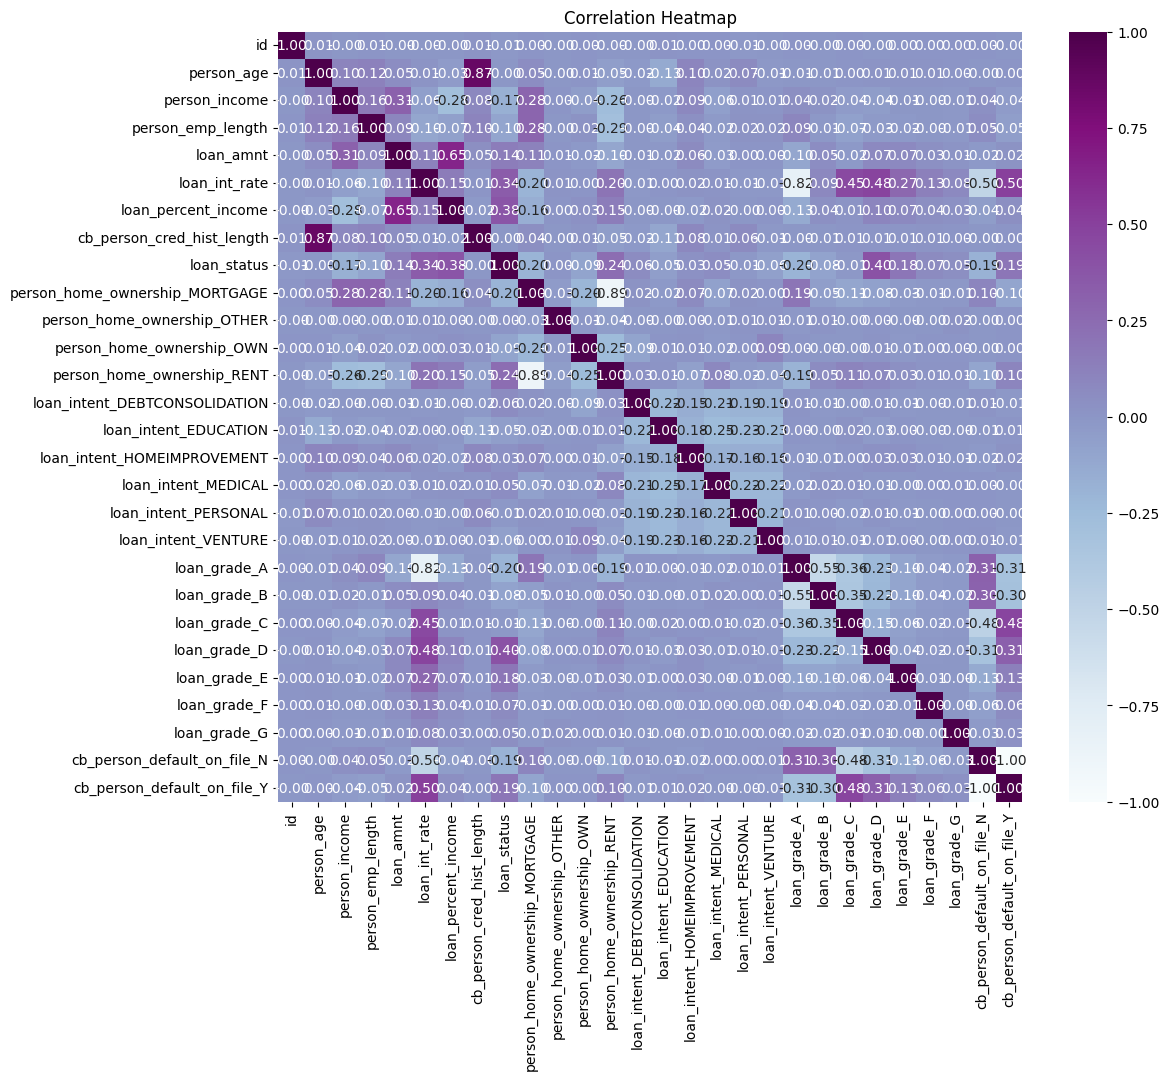

In [ ]:
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()  # Calculate correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

**Now we will check for outliers using IQR and resolve them using Winsorizing**

In [ ]:
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Apply to numerical features
numerical_features = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
for feature in numerical_features:
    outliers = find_outliers_iqr(data, feature)
    print(f"Outliers in {feature}: {len(outliers)}")

Outliers in person_age: 2446
Outliers in person_income: 2411
Outliers in person_emp_length: 1274
Outliers in loan_amnt: 2045
Outliers in loan_int_rate: 34
Outliers in loan_percent_income: 1210
Outliers in cb_person_cred_hist_length: 1993


We will be doing both Capping and removal of Outliers and get the best of them.

In [ ]:
data_cap = data.copy() #Copy of data

In [ ]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data

for featuere in numerical_features:
  data = remove_outliers_iqr(data, featuere)

In [ ]:
def cap_outliers(data, column, lower_percentile=5, upper_percentile=95): #We have used 5-95 rule for capping the outliers
    lower_bound = data[column].quantile(lower_percentile / 100)
    upper_bound = data[column].quantile(upper_percentile / 100)
    data[column] = np.clip(data[column], lower_bound, upper_bound)
    return data

# Apply to numerical features
for feature in numerical_features:
    data_cap = cap_outliers(data_cap, feature)

**We have reached the final step i.e we will split the data for training and testing following the 80-20 rule and then we will scale it**

In [ ]:
# Create ColumnTransformer to apply different preprocessing to different columns
preprocessor = ColumnTransformer(
    transformers=[

        ('num', StandardScaler(), numerical_features),
        ('cat', 'passthrough', categorical_features)  # Passthrough for one-hot encoded features
    ])

In [ ]:
X_cap = data_cap.drop('loan_status', axis=1)
y_cap = data_cap['loan_status']

In [ ]:
X = data.drop('loan_status', axis=1)
y = data['loan_status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_cap_train, X_cap_test, y_cap_train, y_cap_test = train_test_split(X_cap, y_cap, test_size=0.2, random_state=42)

In [ ]:
# Apply preprocessing using ColumnTransformer
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

X_cap_train = preprocessor.fit_transform(X_cap_train)
X_cap_test = preprocessor.transform(X_cap_test)

# Machine Learning Model and Prediction

In [ ]:
# Evaluate performance
def evaluate_model(predictions, y_true, predicted_probs):
    accuracy = accuracy_score(y_true, predictions)
    precision = precision_score(y_true, predictions)
    recall = recall_score(y_true, predictions)
    f1 = f1_score(y_true, predictions)
    roc_auc = roc_auc_score(y_true, predicted_probs)
    conf_matrix = confusion_matrix(y_true, predictions)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print("Confusion Matrix:\n", conf_matrix)

In [ ]:
# RF model with removed outliers
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

predictions = rf_model.predict(X_test)
predicted_probs = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for class 1

print("Random Forest Baseline Model Performance (with removed outliers):")
evaluate_model(predictions, y_test, predicted_probs)

Random Forest Baseline Model Performance (with removed outliers):
Accuracy: 0.9525
Precision: 0.9309
Recall: 0.6876
F1-score: 0.7910
ROC AUC: 0.9259
Confusion Matrix:
 [[8407   65]
 [ 398  876]]


In [ ]:
#RF Model with Capped outliers
rf_model_cap = RandomForestClassifier(random_state=42)

rf_model_cap.fit(X_cap_train, y_cap_train)

predictions_cap = rf_model_cap.predict(X_cap_test)
predicted_probs_cap = rf_model_cap.predict_proba(X_cap_test)[:, 1]  # Probabilities for class 1

print("Random Forest Baseline Model Performance (with Capped Outliers):")
evaluate_model(predictions_cap, y_cap_test, predicted_probs_cap)

Random Forest Baseline Model Performance (with Capped Outliers):
Accuracy: 0.9517
Precision: 0.9222
Recall: 0.7150
F1-score: 0.8055
ROC AUC: 0.9360
Confusion Matrix:
 [[9988   99]
 [ 468 1174]]


**Base Model is Random Forest and to improve upon AUC Score XGBoost is used**

**We will do the same for the both the models**

In [ ]:
#XGB Model trained and tested with removed outliers
xgb_model = XGBClassifier(random_state=42)

xgb_model.fit(X_train, y_train)

predictions = xgb_model.predict(X_test)
predicted_probs = xgb_model.predict_proba(X_test)[:, 1]  # Probabilities for class 1

print("XGBoost Model Performance(with removed outliers):")
evaluate_model(predictions, y_test, predicted_probs)

XGBoost Model Performance(with removed outliers):
Accuracy: 0.9521
Precision: 0.8937
Recall: 0.7190
F1-score: 0.7969
ROC AUC: 0.9514
Confusion Matrix:
 [[8363  109]
 [ 358  916]]


In [ ]:
#XGB Model trained and tested with capped outliers
xgb_model_cap = XGBClassifier(random_state=42)

xgb_model_cap.fit(X_cap_train, y_cap_train)

predictions_cap = xgb_model_cap.predict(X_cap_test)
predicted_probs_cap = xgb_model_cap.predict_proba(X_cap_test)[:, 1]  # Probabilities for class 1

print("XGBoost Model Performance(with capped outliers):")
evaluate_model(predictions_cap, y_cap_test, predicted_probs_cap)

XGBoost Model Performance(with capped outliers):
Accuracy: 0.9519
Precision: 0.8963
Recall: 0.7424
F1-score: 0.8121
ROC AUC: 0.9548
Confusion Matrix:
 [[9946  141]
 [ 423 1219]]


# Here we have found that the capped outlier version of both the model outperforms the removed outliers one so we will save this model and use it for the predictions

In [ ]:
import joblib

# Save the model to a file named 'rf_model.joblib'
filename = 'rf_model.joblib'
joblib.dump(rf_model_cap, filename)

# Save the model to a file named 'xgb_model.joblib'
filename = 'xgb_model.joblib'
joblib.dump(xgb_model_cap, filename)

['xgb_model.joblib']

#Testing

**Now we have a trained RandomForest and XGBModel ready to use for our actual predictions**

In [ ]:
data_test = pd.read_csv("Loan_test.csv")

In [ ]:
data_test.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [ ]:
data_test.shape

(39098, 12)

In [ ]:
data_test.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length'],
      dtype='object')

**We need to perform some pre-processing before passing it as input in our model**

In [ ]:
categorical_features_test = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'] #Categorical features for encoding

In [ ]:
data_test, categorical_features = one_hot_encode_categorical_features(data_test, categorical_features_test)

In [ ]:
data_test.head()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,58645,23,69000,3.0,25000,15.76,0.36,2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,58646,26,96000,6.0,10000,12.68,0.10,4,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,58647,26,30000,5.0,4000,17.19,0.13,2,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,58648,33,50000,4.0,7000,8.90,0.14,7,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,58649,26,102000,8.0,15000,16.32,0.15,4,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Apply outlier check
numerical_features = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
for feature in numerical_features:
    outliers = find_outliers_iqr(data_test, feature)
    print(f"Outliers in {feature}: {len(outliers)}")

Outliers in person_age: 1620
Outliers in person_income: 1540
Outliers in person_emp_length: 778
Outliers in loan_amnt: 1388
Outliers in loan_int_rate: 11
Outliers in loan_percent_income: 811
Outliers in cb_person_cred_hist_length: 1436


In [ ]:
# Capping the outliers according to 5-95 rule
for feature in numerical_features:
    data = cap_outliers(data_test, feature)

In [ ]:
data_test_transformed = preprocessor.transform(data_test)

In [ ]:
#Load the saved models
rf_model = joblib.load('rf_model.joblib')
xgb_model = joblib.load('xgb_model.joblib')

In [ ]:
#Make predictions using both models
rf_predictions = rf_model.predict(data_test_transformed)
xgb_predictions = xgb_model.predict(data_test_transformed)

In [ ]:
#Create a DataFrame for predictions with 'id' column
predictions_df = pd.DataFrame({'id': data_test['id']})

In [ ]:
#Add prediction columns from both models
predictions_df['rf_loan_status'] = rf_predictions
predictions_df['xgb_loan_status'] = xgb_predictions

In [ ]:
#Save to a new CSV file
predictions_df.to_csv('predictions.csv', index=False)

In [ ]:
df = pd.read_csv("predictions.csv")
df.head()

,id,rf_loan_status,xgb_loan_status
0,58645,1,1
1,58646,0,0
2,58647,1,1
3,58648,0,0
4,58649,0,0


**Here we're checking for the difference in predictions of both the model i.e in how many predictions they differ**

In [ ]:
different_predictions_mask = predictions_df['rf_loan_status'] != predictions_df['xgb_loan_status']

num_differences = different_predictions_mask.sum()

print(f"Number of different predictions: {num_differences}")

Number of different predictions: 510


**The notebook predicts loan approvals using a preprocessed loan dataset. It employs Random Forest and XGBoost models, optimized by handling outliers and categorical features. The best performing models are then used to predict loan outcomes on a test dataset, with results saved to a CSV file**

# Thank You